In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data = pd.read_csv('') # eg. preds_screen_1_2.csv
re = pd.read_csv('') # eg. s_cv_2.csv
data.head()


,smiles,conductivity,temperature,alpha,beta,gamma,theta
0,CCC(CC(CC(c1ccc(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F...,-8.677358,-19.581395,-3.038894,2.255979,-2.245749,5.360183
1,CCC(CC(CC(c1ccc(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F...,-7.843407,-9.813953,-3.038894,2.255979,-2.245749,4.520092
2,CCC(CC(CC(c1ccc(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F...,-7.131839,0.387597,-3.038894,2.255979,-2.245749,3.797167
3,CCC(CC(CC(c1ccc(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F...,-6.511671,10.155039,-3.038894,2.255979,-2.245749,3.157535
4,CCC(CC(CC(c1ccc(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F...,-5.905942,20.790698,-3.038894,2.255979,-2.245749,2.515753


In [32]:
re.iloc[0].conductivity

-10.357013

In [10]:
def slimnet(data):
    order = data.theta
    disorder = data.alpha + data.beta**data.gamma
    re = - order + disorder
    return order, disorder, re

def plotdata(order, disorder, pre, dt):
    dlen = len(dt)
    
    plt.plot(range(dlen), dt, "ok:",  label='ground truth')
    plt.plot(range(dlen), pre, "ob:", label='prediction')
    plt.bar(range(dlen), pre, color = "#669ef2", label='ordered phase')
    plt.bar(range(dlen), disorder,color = "#F3D266" , label='disordered phase') # #F3D266, #F1D77E, fbb45d
    plt.legend()
    plt.savefig('test.png', dpi=500)
    plt.show()
    return 

In [4]:
order, disorder, pre, groudt = [], [], [], []

for i in tqdm(range(30)):
    # data = data.iloc[i]
    a, b, c = slimnet(data.iloc[i])
    order.append(a)
    disorder.append(b)
    pre.append(c)
    groudt.append(data.iloc[i].conductivity)
   

100%|██████████| 30/30 [00:00<00:00, 6015.93it/s]


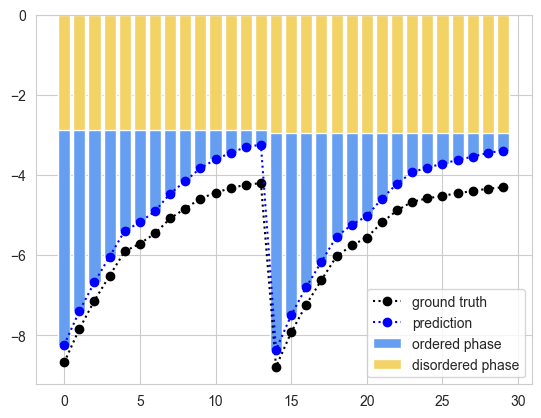

In [11]:
plotdata(order, disorder, pre, groudt)